In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

function is_p_in_interval(p, interval)
    interval[begin] ≤ p ≤ interval[end]
end

interval1(k, n) = k/n - 0.9/√n, k/n + 0.9/√n

function interval_wald(k, n)
    p̂ = k/n
    p̂ - 1.96√(p̂*(1-p̂)/n), p̂ + 1.96√(p̂*(1-p̂)/n)
end

function interval_wilson(k, n)
    c = 1.96
    p̂ = k/n
    L = 1/(1+c^2/n) * (p̂ + c^2/(2n) - c*√(p̂*(1-p̂)/n + c^2/(4n^2)))
    U = 1/(1+c^2/n) * (p̂ + c^2/(2n) + c*√(p̂*(1-p̂)/n + c^2/(4n^2)))
    L, U
end

function prob_p_in_interval(intervalfunc, n, p)
    bin = Binomial(n, p)
    sum(k -> is_p_in_interval(p, intervalfunc(k, n)) * pdf(bin, k), support(bin))
end

prob_p_in_interval (generic function with 1 method)

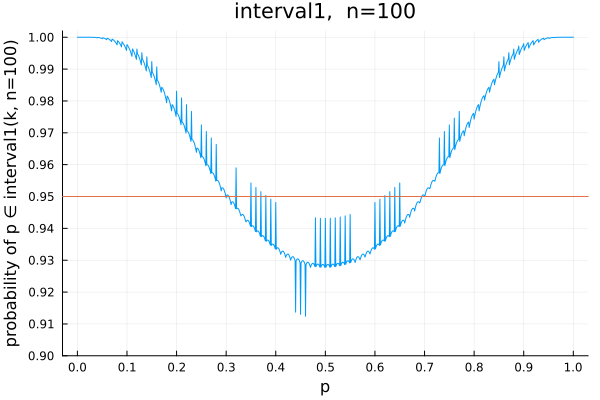

In [2]:
n = 100
p = range(0, 1, 1001)
plot(p, p -> prob_p_in_interval(interval1, n, p); label="")
plot!(xguide="p", yguide="probability of p ∈ interval1(k, n=$n)")
plot!(ylim=(0.9, 1.002), ytick=0:0.01:1, xtick=0:0.1:1)
hline!([0.95]; label="")
title!("interval1,  n=$n")

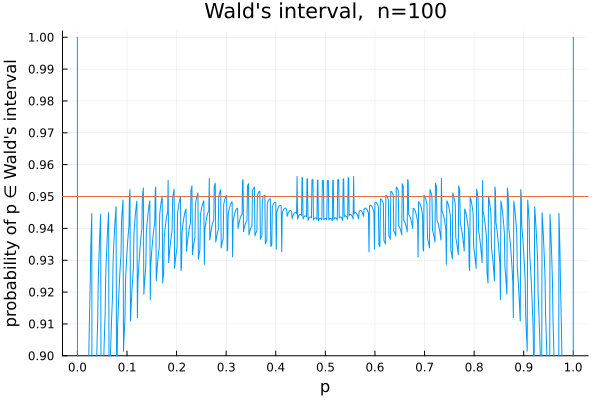

In [3]:
n = 100
p = range(0, 1, 1001)
plot(p, p -> prob_p_in_interval(interval_wald, n, p); label="")
plot!(xguide="p", yguide="probability of p ∈ Wald's interval")
plot!(ylim=(0.9, 1.002), ytick=0:0.01:1, xtick=0:0.1:1)
hline!([0.95]; label="")
title!("Wald's interval,  n=$n")

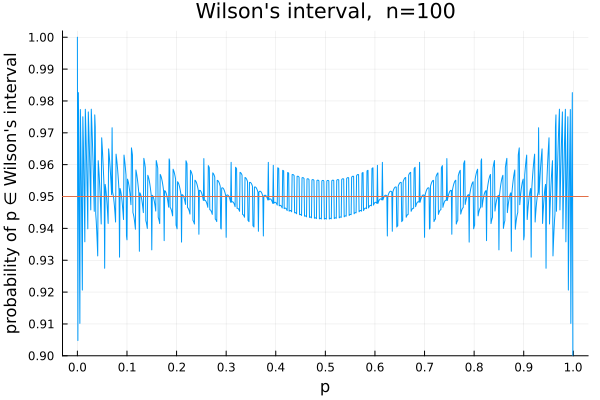

In [4]:
n = 100
p = range(0, 1, 1001)
plot(p, p -> prob_p_in_interval(interval_wilson, n, p); label="")
plot!(xguide="p", yguide="probability of p ∈ Wilson's interval")
plot!(ylim=(0.9, 1.002), ytick=0:0.01:1, xtick=0:0.1:1)
hline!([0.95]; label="")
title!("Wilson's interval,  n=$n")

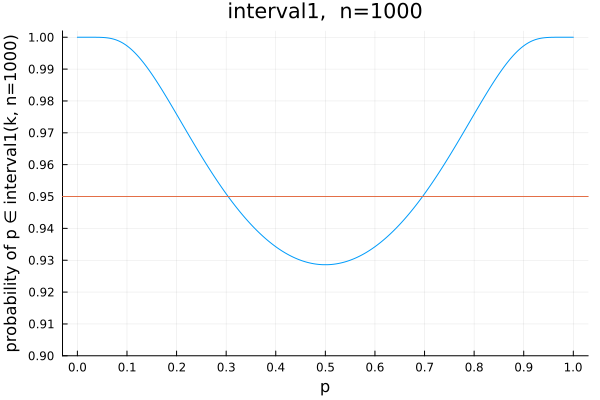

In [5]:
n = 1000
p = range(0, 1, 1001)
plot(p, p -> prob_p_in_interval(interval1, n, p); label="")
plot!(xguide="p", yguide="probability of p ∈ interval1(k, n=$n)")
plot!(ylim=(0.9, 1.002), ytick=0:0.01:1, xtick=0:0.1:1)
hline!([0.95]; label="")
title!("interval1,  n=$n")

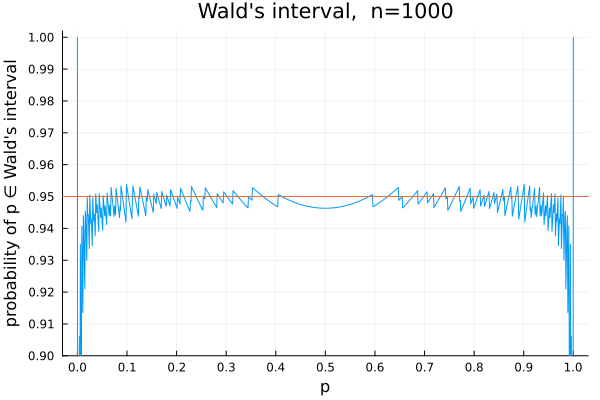

In [6]:
n = 1000
p = range(0, 1, 1001)
plot(p, p -> prob_p_in_interval(interval_wald, n, p); label="")
plot!(xguide="p", yguide="probability of p ∈ Wald's interval")
plot!(ylim=(0.9, 1.002), ytick=0:0.01:1, xtick=0:0.1:1)
hline!([0.95]; label="")
title!("Wald's interval,  n=$n")

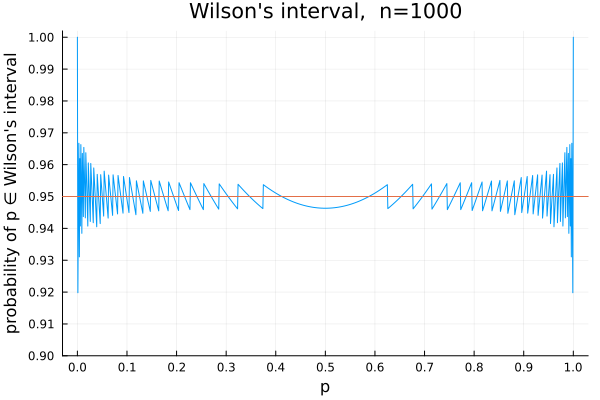

In [7]:
n = 1000
p = range(0, 1, 1001)
plot(p, p -> prob_p_in_interval(interval_wilson, n, p); label="")
plot!(xguide="p", yguide="probability of p ∈ Wilson's interval")
plot!(ylim=(0.9, 1.002), ytick=0:0.01:1, xtick=0:0.1:1)
hline!([0.95]; label="")
title!("Wilson's interval,  n=$n")